In [67]:
import sys
import os
sys.path.append(sys.path[0]+'/../../')
from functions import *
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [68]:
pristineFits=np.transpose(np.loadtxt('pristine.txt'))

In [69]:
len(pristineFits)

4

In [70]:
str(int(pristineFits[0][0]))+str(int(pristineFits[1][0]))

'20231104122125'

In [71]:
pristineDates=np.empty(0)
for i in range(0,len(pristineFits[0])):
    pristineDates=np.append(pristineDates,str(int(pristineFits[0][i]))+str(int(pristineFits[1][i])))

In [72]:
PsortedDates=np.empty(0)
for i in pristineDates:
    PsortedDates=np.append(PsortedDates,datetime.strptime(i,"%Y%m%d%H%M%S"))


In [73]:
PsortedDates

array([datetime.datetime(2023, 11, 4, 12, 21, 25),
       datetime.datetime(2023, 11, 4, 16, 51, 8),
       datetime.datetime(2023, 11, 4, 16, 52, 9),
       datetime.datetime(2023, 11, 4, 16, 53, 8),
       datetime.datetime(2023, 11, 4, 16, 54, 8),
       datetime.datetime(2023, 11, 4, 16, 55, 9),
       datetime.datetime(2023, 11, 4, 16, 56, 8),
       datetime.datetime(2023, 11, 4, 16, 57, 8),
       datetime.datetime(2023, 11, 4, 16, 58, 8),
       datetime.datetime(2023, 11, 4, 16, 59, 8),
       datetime.datetime(2023, 11, 4, 17, 0, 8),
       datetime.datetime(2023, 11, 4, 17, 1, 8),
       datetime.datetime(2023, 11, 4, 17, 2, 8),
       datetime.datetime(2023, 11, 4, 17, 3, 8),
       datetime.datetime(2023, 11, 4, 17, 4, 9),
       datetime.datetime(2023, 11, 4, 17, 5, 8),
       datetime.datetime(2023, 11, 4, 17, 6, 9),
       datetime.datetime(2023, 11, 4, 17, 7, 8),
       datetime.datetime(2023, 11, 4, 17, 8, 8),
       datetime.datetime(2023, 11, 4, 17, 9, 8),
       da

In [74]:
PdsNMR=np.empty(0)
for i in range(0,len(pristineFits[0])):
    PdsNMR=np.append(PdsNMR,(pristineFits[2][i]+pristineFits[3][i])/2)

EPR From Bill: 3.27,3.22,3.27

In [75]:
EPR=(3.27+3.27+3.22)/3

In [76]:
months = np.array([dt.month for dt in PsortedDates])

np.where(months == 1)

(array([63]),)

In [77]:
PCorrectedDSNMR=np.delete(PdsNMR,63)
PSortedDatesCorrected=np.delete(PsortedDates,63)

In [78]:
PSortedDatesCorrected=PSortedDatesCorrected[np.where(PCorrectedDSNMR*EPR<60)]
PCorrectedDSNMR=PCorrectedDSNMR[np.where(PCorrectedDSNMR*EPR<60)]

(array([19666., 19670., 19674., 19678., 19682., 19686., 19690., 19692.]),
 [Text(19666.0, 0, '2023-11-05'),
  Text(19670.0, 0, '2023-11-09'),
  Text(19674.0, 0, '2023-11-13'),
  Text(19678.0, 0, '2023-11-17'),
  Text(19682.0, 0, '2023-11-21'),
  Text(19686.0, 0, '2023-11-25'),
  Text(19690.0, 0, '2023-11-29'),
  Text(19692.0, 0, '2023-12-01')])

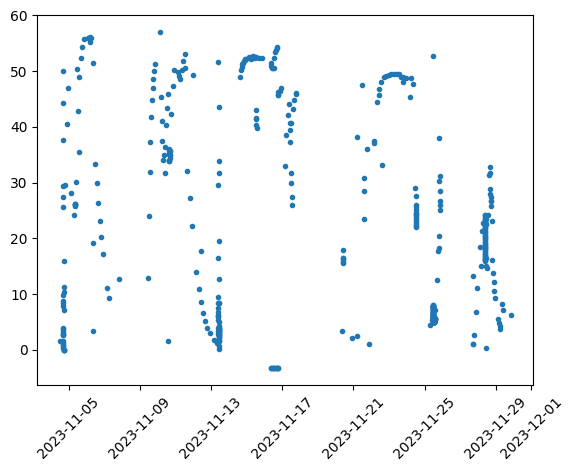

In [79]:
plt.plot(PSortedDatesCorrected,PCorrectedDSNMR*EPR,'.')
plt.xticks(rotation=45)


In [80]:
np.save(sys.path[0]+'/../PSortedDatesCorrected.npy',PSortedDatesCorrected)
np.save(sys.path[0]+'/../PCorrectedDSNMR.npy',PCorrectedDSNMR*EPR)